Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

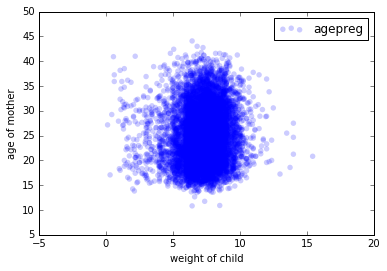

nan
0.0946100410966


In [5]:
import nsfg
import thinkplot
import math
import pandas
import thinkstats2
df = nsfg.ReadFemPreg()

weights = df.totalwgt_lb
ages = df.agepreg

thinkplot.Scatter(weights, ages)
thinkplot.Show(xlabel='weight of child', ylabel='age of mother')


def Cov(xs, ys, meanx=None, meany=None):
    xs_filtered = xs[(~xs.isnull()) & (~ys.isnull())]
    ys_filtered = ys[(~xs.isnull()) & (~ys.isnull())]
    
    xs = np.asarray(xs_filtered)
    ys = np.asarray(ys_filtered)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx =  np.mean(xs), np.var(xs)
    meany, vary = np.mean(ys), np.var(ys)

    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xs = pandas.Series(xs)
    ys = pandas.Series(ys)
    return xs.corr(ys, method='spearman')


# preg = df.dropna()
# weight = df.totalwgt_lb
# age = df.agepreg

print thinkstats2.Cov(ages, weights) # Corrolation is returning NaN still...
print SpearmanCorr(ages, weights)

